In [15]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,average_precision_score
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline



## Question No. 1

### 1.i

In [16]:
#downloading the data
train_x = np.loadtxt("Xtrain.csv")
print("The amount of training examples is ", len(train_x))
test_x = np.loadtxt("Xtest.csv")
print("The amount of test examples is ",len(test_x))
train_y = np.loadtxt("Ytrain.csv")

The amount of training examples is  3000
The amount of test examples is  3000


In [17]:
#getting lists of random selected objects for each class (getting the indices)
objpos = random.sample(list((np.where(train_y == 1))[0]), 10)
objneg = random.sample(list((np.where(train_y == -1))[0]), 10)

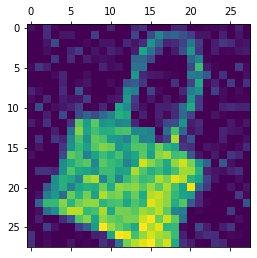

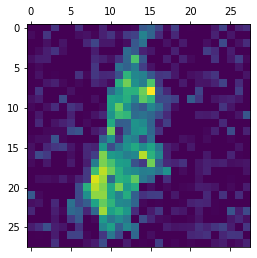

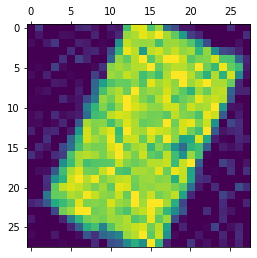

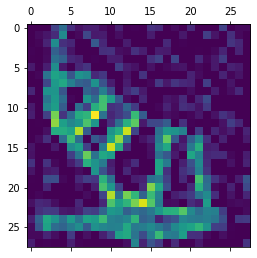

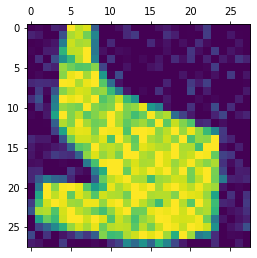

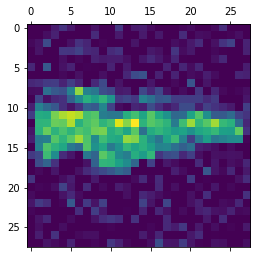

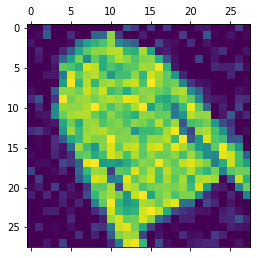

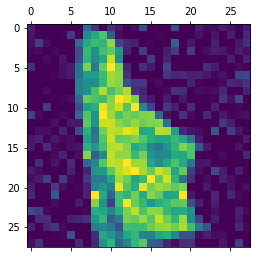

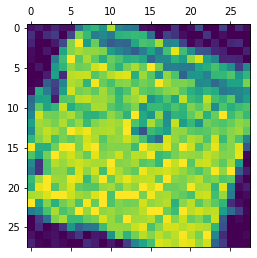

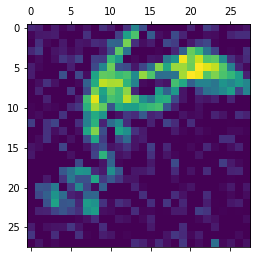

In [18]:
#showing samples with label = 1
for i in objpos:
    plt.matshow(train_x[i].reshape((28,28)))


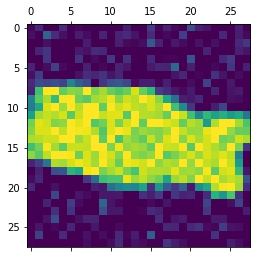

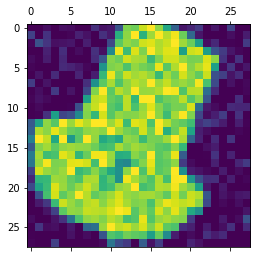

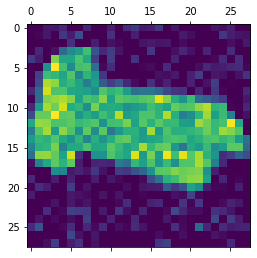

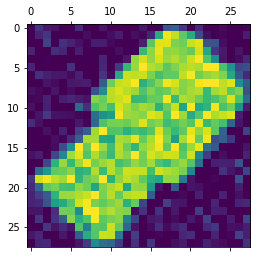

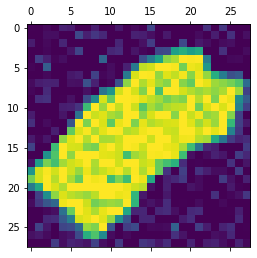

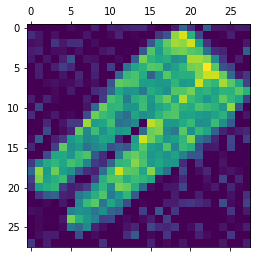

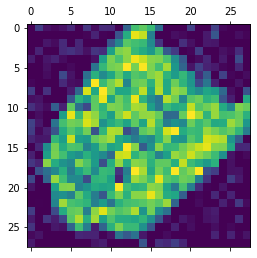

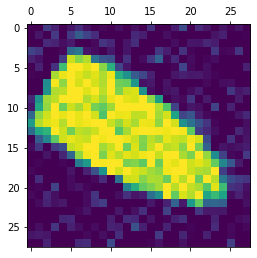

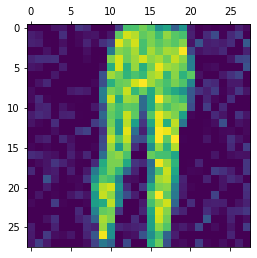

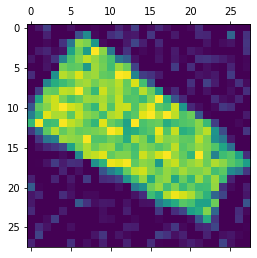

In [19]:
#showing samples with label = -1
for i in objneg:
    plt.matshow(train_x[i].reshape((28,28)))


### 1.ii

In [20]:
print("The amount of positive examples is ",np.count_nonzero(train_y == 1))

The amount of positive examples is  1824


In [21]:
print("The amount of negative examples is ",np.count_nonzero(train_y == -1))

The amount of negative examples is  1176


### 1.iii

#### Examining the amount the samples, we may say that the dataset is quite class-balanced, so using the AUC-ROC performance metric is a good approach.



### 1.iv
#### The equation of the classification accuracy for a random classifier (Random guess) is as follows: 
#### Accuracy = 1/k (here k is the number of classes). In this particular case, the value of k is equal to 2. So, the classification accuracy of the random classifier in this case is 1/2 = 50%

### 1.v
#### ROC:
#### TPR = TP / (TP + FN); FPR = FP / (FP + TN). In words, TPR shows the percentage of all samples that should be classified as 1 and are really classified as 1 and FPR shows the percentage of samples that should be classified as -1 but are instead classified as 1. ROC is the plot of TPR vs FPR. Since there is a random classifier in this case, the probability for a sample to be classified as -1 or 1 is the same. Thus, the curve is presented by the function y = x and the area under the curve is 0.5. 

#### PR:
#### Recall = TP / (TP + FN); Precision = TP / (TP + FP). PR is the plot of Recall vs Precision. Similar to ROC, since there is a random classifier in this case, the probability for a sample to be classified as -1 or 1 is the same. So the Precision-Recall curve should be represented by the function y = x and the area under the curve is 0.5. 



## Question No. 2

In [22]:
#performing 5-fold stratified cross-validation
#skf = StratifiedKFold(n_splits = 5, shuffle = True)
skf = StratifiedKFold(n_splits = 5)
skf_split_data = skf.split(train_x, train_y)

### 2.i

In [23]:
#train_test is a function that performs 5-fold stratified cross-validation over training data with given classifier. 
#As a result, we get three arrays: accuracy, auc roc and auc pr for every iteration
def train_test(train_x, train_y, printresults = True, clf = KNeighborsClassifier(1)):
    skf_split_data = skf.split(train_x, train_y)
    accuracy_array, auc_roc_array, auc_pr_array = [],[],[]
    for train_ind, test_ind in skf_split_data:
        trainx, trainy = train_x[train_ind], train_y[train_ind]
        testx, testy = train_x[test_ind], train_y[test_ind]
        clf.fit(trainx, trainy)
        predicted = clf.predict(testx)
        accuracy_array.append(accuracy_score(testy,predicted))
        auc_roc_array.append(roc_auc_score(testy, predicted))
        auc_pr_array.append(average_precision_score(testy, predicted))
    if printresults:
        for i in range(5):
            print("Iteration #", i+1)
            print("Accuracy : ", accuracy_array[i] )
            print("AUC ROC : ", auc_roc_array[i] )
            print("AUC PR : ", auc_pr_array[i] )
    return accuracy_array, auc_roc_array, auc_pr_array

accuracy_array, auc_roc_array, auc_pr_array = train_test(train_x, train_y)


Iteration # 1
Accuracy :  0.7966666666666666
AUC ROC :  0.7951666977090707
AUC PR :  0.804917421759527
Iteration # 2
Accuracy :  0.8266666666666667
AUC ROC :  0.8219178082191781
AUC PR :  0.8271165348253906
Iteration # 3
Accuracy :  0.8416666666666667
AUC ROC :  0.8266686097347712
AUC PR :  0.8262400114155252
Iteration # 4
Accuracy :  0.8266666666666667
AUC ROC :  0.8287379772661032
AUC PR :  0.8368078533392951
Iteration # 5
Accuracy :  0.8266666666666667
AUC ROC :  0.8264645875837948
AUC PR :  0.8334955469467631


### 2.ii

In [24]:
#print_metrics is a function that print the mean and standard deviation of each performance metric(accuracy, auc roc and auc pr)
#across all the folds. It receives three arrays which are the results from function "train_test"
def print_metrics(accuracy_array, auc_roc_array, auc_pr_array):
    print("Accuracy")
    print("Mean : ", np.mean(accuracy_array))
    print("Std : ", np.std(accuracy_array))
    print("AUC ROC")
    print("Mean : ", np.mean(auc_roc_array))
    print("Std : ", np.std(auc_roc_array))
    print("AUC PR")
    print("Mean : ", np.mean(auc_pr_array))
    print("Std : ", np.std(auc_pr_array))

print_metrics(accuracy_array, auc_roc_array, auc_pr_array)

Accuracy
Mean :  0.8236666666666667
Std :  0.014696938456699083
AUC ROC
Mean :  0.8197911361025836
Std :  0.012512124244317422
AUC PR
Mean :  0.8257154736573001
Std :  0.011120858801351182


### 2.iii

In [25]:
#Standardization 
StandardScaler = preprocessing.StandardScaler().fit(train_x)
StandardScaler_train_x = StandardScaler.transform(train_x)
staccuracy_array, stauc_roc_array, stauc_pr_array = train_test(StandardScaler_train_x, train_y)
print_metrics(staccuracy_array, stauc_roc_array, stauc_pr_array)

Iteration # 1
Accuracy :  0.795
AUC ROC :  0.7900679828645929
AUC PR :  0.7990977114054036
Iteration # 2
Accuracy :  0.8166666666666667
AUC ROC :  0.8136986301369864
AUC PR :  0.8209712682026927
Iteration # 3
Accuracy :  0.82
AUC ROC :  0.8118915767997668
AUC PR :  0.8169770557379523
Iteration # 4
Accuracy :  0.8266666666666667
AUC ROC :  0.8294957738268726
AUC PR :  0.8379312342397601
Iteration # 5
Accuracy :  0.8433333333333334
AUC ROC :  0.84167881084232
AUC PR :  0.8460726014313563
Accuracy
Mean :  0.8203333333333334
Std :  0.015648926125740672
AUC ROC
Mean :  0.8173665548941077
Std :  0.01747480948805079
AUC PR
Mean :  0.824209974203433
Std :  0.016490467035329553


In [26]:
#Min Max Scaler 
MinMaxScaler = preprocessing.MinMaxScaler().fit(train_x)
MinMaxScaler_train_x = MinMaxScaler.transform(train_x)
mmaccuracy_array, mmauc_roc_array, mmauc_pr_array = train_test(MinMaxScaler_train_x, train_y)
print_metrics(mmaccuracy_array, mmauc_roc_array, mmauc_pr_array)

Iteration # 1
Accuracy :  0.7966666666666666
AUC ROC :  0.7951666977090707
AUC PR :  0.804917421759527
Iteration # 2
Accuracy :  0.8283333333333334
AUC ROC :  0.8240454677936462
AUC PR :  0.8291846606299821
Iteration # 3
Accuracy :  0.8366666666666667
AUC ROC :  0.8225590206936753
AUC PR :  0.8232033581418762
Iteration # 4
Accuracy :  0.83
AUC ROC :  0.8314777032935005
AUC PR :  0.8388847132985816
Iteration # 5
Accuracy :  0.8233333333333334
AUC ROC :  0.8214514718740892
AUC PR :  0.8282079928414459
Accuracy
Mean :  0.8230000000000001
Std :  0.01384035966135114
AUC ROC
Mean :  0.8189400722727964
Std :  0.01239221133465041
AUC PR
Mean :  0.8248796293342824
Std :  0.011198690024355137


In [27]:
#Normalization
Normalizer = preprocessing.Normalizer()
Normalizer_train_x = Normalizer.fit_transform(train_x)
normaccuracy_array, normauc_roc_array, normauc_pr_array = train_test(Normalizer_train_x, train_y)
print_metrics(normaccuracy_array, normauc_roc_array, normauc_pr_array)

Iteration # 1
Accuracy :  0.8366666666666667
AUC ROC :  0.8251536598994226
AUC PR :  0.8255223208164385
Iteration # 2
Accuracy :  0.8383333333333334
AUC ROC :  0.8208976974642961
AUC PR :  0.8203863716192483
Iteration # 3
Accuracy :  0.8433333333333334
AUC ROC :  0.8272806761877003
AUC PR :  0.8262808396162968
Iteration # 4
Accuracy :  0.8483333333333334
AUC ROC :  0.8397260273972603
AUC PR :  0.8404640659122493
Iteration # 5
Accuracy :  0.8566666666666667
AUC ROC :  0.8511221218303701
AUC PR :  0.8521411224528517
Accuracy
Mean :  0.8446666666666667
Std :  0.007257180352359083
AUC ROC
Mean :  0.8328360365558097
Std :  0.011083842011124945
AUC PR
Mean :  0.832958944083417
Std :  0.011681205793221275


In [28]:
#Binarization 
Binarizer = preprocessing.Binarizer()
Binarizer_train_x = Binarizer.fit_transform(train_x)
binaccuracy_array, binauc_roc_array, binauc_pr_array = train_test(Binarizer_train_x, train_y)
print_metrics(binaccuracy_array, binauc_roc_array, binauc_pr_array)

Iteration # 1
Accuracy :  0.6116666666666667
AUC ROC :  0.5965030731979883
AUC PR :  0.6586315327864624
Iteration # 2
Accuracy :  0.6116666666666667
AUC ROC :  0.5997376858058875
AUC PR :  0.6623002613033494
Iteration # 3
Accuracy :  0.61
AUC ROC :  0.5809385018944914
AUC PR :  0.6506552686589824
Iteration # 4
Accuracy :  0.65
AUC ROC :  0.63958029728942
AUC PR :  0.6874221309857487
Iteration # 5
Accuracy :  0.5983333333333334
AUC ROC :  0.5849897988924512
AUC PR :  0.6534821287986143
Accuracy
Mean :  0.6163333333333334
Std :  0.017556258776351585
AUC ROC
Mean :  0.6003498714160477
Std :  0.020817934751509153
AUC PR
Mean :  0.6624982645066314
Std :  0.013097611946350748


#### The various pre-processing forms applied on cross-validation are presented above. As we can see, the Binarization process significantly decreases all performance metrics while the Normalization process improves the accuracy by about 2%.

### 2.iv

In [29]:
#Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given 
#model. This is significant as the performance of the entire model is based on the hyper parameter values specified.
#Here, for a KNN classifier, n_neighbors is the hyper parameter needs to be found.
param_grid = [
    {
        'n_neighbors':[i for i in range(1,20)]
    }
]
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, n_jobs = -1, cv = skf)
 
grid_search.fit(train_x, train_y)

grid_search.best_score_
grid_search.best_params_
grid_search.best_estimator_

k_knn = grid_search.best_params_['n_neighbors']

print(k_knn)
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

5
0.841
{'n_neighbors': 5}
KNeighborsClassifier()


In [30]:
kkn = KNeighborsClassifier(n_neighbors = k_knn )
accuracy_array, auc_roc_array, auc_pr_array = train_test(train_x, train_y, clf = knn )
print_metrics(accuracy_array, auc_roc_array, auc_pr_array)

Iteration # 1
Accuracy :  0.8516666666666667
AUC ROC :  0.8486915626746135
AUC PR :  0.8506651516566532
Iteration # 2
Accuracy :  0.8366666666666667
AUC ROC :  0.8346837656659867
AUC PR :  0.8397030655100679
Iteration # 3
Accuracy :  0.835
AUC ROC :  0.8196735645584377
AUC PR :  0.8202696917808219
Iteration # 4
Accuracy :  0.8516666666666667
AUC ROC :  0.8470125327892742
AUC PR :  0.8490288513048135
Iteration # 5
Accuracy :  0.83
AUC ROC :  0.8231419411250365
AUC PR :  0.8271031128650754
Accuracy
Mean :  0.841
Std :  0.008981462390205008
AUC ROC
Mean :  0.8346406733626697
Std :  0.011888880873364597
AUC PR
Mean :  0.8373539746234864
Std :  0.01196629679194143


## Question No. 3

In [31]:
param_grid_knn = [
    {
        'n_neighbors':[i for i in range(1,20)]
    }
]

knn = KNeighborsClassifier()


param_grid_perceptron = [
    {
        'alpha':[1e-20,1e-19,1e-18,1e-17,1e-16,1e-15,1e-14,1e-13,1e-12,1e-11,1e-10,
                     1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10],
        'penalty':['l1','l2']
    }
]
perceptron = Perceptron()


param_grid_nb = [
    {
        'var_smoothing':[1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100]
    }
]
nb = GaussianNB()

param_grid_lr = [
    {
        'C':[1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 0.1, 1, 10, 100], 
        'penalty':['l1','l2']
    }
]
lr = LogisticRegression()

param_grid_linsvm = [
    {
        'C':[1e-8,1e-7,1e-6,1e-5,1e-4, 0.1, 1, 10, 100], 
    }
]
lsvm = LinearSVC()

param_grid_svm = [
    {
        'C':[1e-8,1e-7,1e-6,1e-5,1e-4, 0.1, 1, 10, 100], 
        'kernel': ['rbf', 'poly', 'sigmoid'],
        #'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 

    }
]
svm = SVC()
params_array = [param_grid_knn, param_grid_perceptron, param_grid_nb, param_grid_lr, param_grid_linsvm, param_grid_svm]
classifiers = [knn, perceptron, nb, lr, lsvm, svm]

In [32]:
#searching for optimal parameters for all classifiers and looking at the new performances 
classifiers_opt = []
for i in range(6):
    grid_search = GridSearchCV(classifiers[i], params_array[i], n_jobs = -1, cv = skf)
    grid_search.fit(train_x, train_y)
    print(grid_search.best_score_)
    print(grid_search.best_params_)
    print(grid_search.best_estimator_)
    classifiers_opt.append(grid_search.best_estimator_)
    accuracy_array, auc_roc_array, auc_pr_array = train_test(train_x, train_y, clf = grid_search.best_estimator_, printresults = False )
    print_metrics(accuracy_array, auc_roc_array, auc_pr_array)

0.841
{'n_neighbors': 5}
KNeighborsClassifier()
Accuracy
Mean :  0.841
Std :  0.008981462390205008
AUC ROC
Mean :  0.8346406733626697
Std :  0.011888880873364597
AUC PR
Mean :  0.8373539746234864
Std :  0.01196629679194143
0.6916666666666667
{'alpha': 1e-05, 'penalty': 'l1'}
Perceptron(alpha=1e-05, penalty='l1')
Accuracy
Mean :  0.6916666666666667
Std :  0.01696401419999929
AUC ROC
Mean :  0.6758249184532967
Std :  0.019443170807775606
AUC PR
Mean :  0.7119122817765972
Std :  0.015641780547057643
0.625
{'var_smoothing': 1e-10}
GaussianNB(var_smoothing=1e-10)
Accuracy
Mean :  0.625
Std :  0.012605113600792705
AUC ROC
Mean :  0.6638131160788487
Std :  0.016108463383049016
AUC PR
Mean :  0.7148490172244095
Std :  0.013745995706893586


/Users/a226/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7370000000000001
{'C': 1e-06, 'penalty': 'l2'}
LogisticRegression(C=1e-06)


/Users/a226/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/a226/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

Accuracy
Mean :  0.7370000000000001
Std :  0.011421227799341217
AUC ROC
Mean :  0.7103288872576623
Std :  0.010501438771565008
AUC PR
Mean :  0.7330495001727244
Std :  0.007266158934737187
0.7370000000000001
{'C': 1e-07}
LinearSVC(C=1e-07)
Accuracy
Mean :  0.7370000000000001
Std :  0.013012814197295391
AUC ROC
Mean :  0.7106299050232726
Std :  0.012168843078092951
AUC PR
Mean :  0.7333303632496084
Std :  0.00824877642962635
0.8493333333333334
{'C': 10, 'kernel': 'rbf'}
SVC(C=10)
Accuracy
Mean :  0.8493333333333334
Std :  0.010143416036468634
AUC ROC
Mean :  0.8375771049070575
Std :  0.014455829799051809
AUC PR
Mean :  0.8371697800121227
Std :  0.0146718650985964


#### The results are presented in the table. SVM shows the best performance, while KNN is also good. 



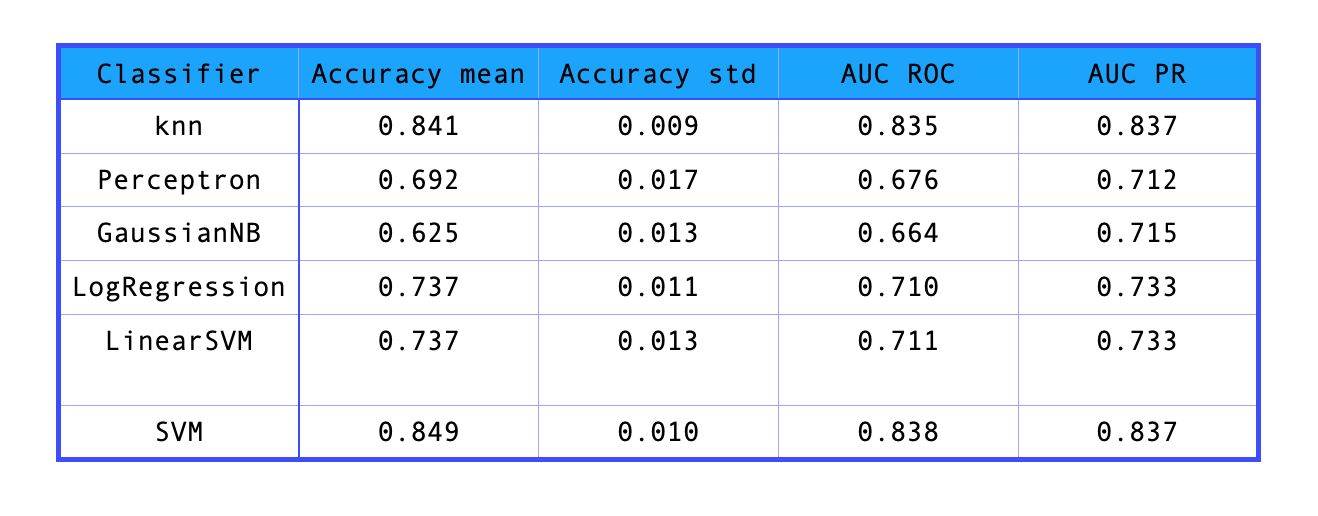

## Question No. 4

### 4.i

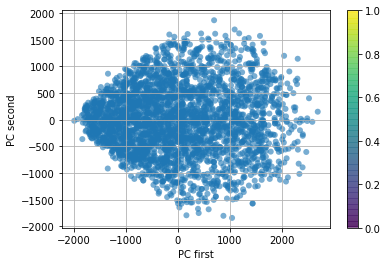

In [33]:
pca2comp = PCA(n_components = 2)
pca2comp.fit(train_x)
#projecting data onto principal components
prj2 = pca2comp.transform(train_x)
plt.scatter(prj2[:, 0], prj2[:, 1],
            edgecolor='none', alpha=0.6,
            cmap=plt.cm.get_cmap('nipy_spectral', 10));
plt.grid()
plt.xlabel('PC first')
plt.ylabel('PC second')
plt.colorbar();
plt.show()

#### The scatter plot presents two kinds of data - deep blue and light blue. Deep blue data looks to be more clustered. Thus,  this type of data is more likely to be classified successfully.



### 4.ii

(3000, 784)
(3000, 315)


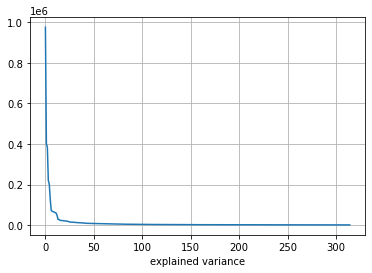

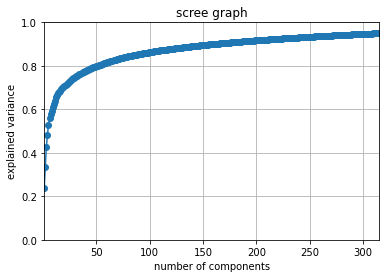

In [34]:
pcacomp = PCA(n_components = 0.95)
pcacomp.fit(train_x)
#projecting data onto principal components
prj = pcacomp.transform(train_x)
print(train_x.shape)
print(prj.shape)
plt.plot(pcacomp.explained_variance_); 
plt.grid();
plt.xlabel('explained variance')
plt.figure()

#plotting the scree graph
plt.plot(np.arange(len(pcacomp.explained_variance_ratio_))+1, np.cumsum(pcacomp.explained_variance_ratio_),'o-') 
plt.axis([1,len(pcacomp.explained_variance_ratio_),0,1])
plt.xlabel('number of components')
plt.ylabel('explained variance');
plt.title('scree graph')
plt.grid()
plt.show()

#### The number of dimensions is 315.

### 4.iii

In [35]:
grid_search = GridSearchCV(SVC(), param_grid_svm, n_jobs = -1, cv = skf)
grid_search.fit(prj, train_y)
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)
accuracy_array, auc_roc_array, auc_pr_array = train_test(prj, train_y, clf = grid_search.best_estimator_, printresults = False )
print_metrics(accuracy_array, auc_roc_array, auc_pr_array)

0.852
{'C': 10, 'kernel': 'rbf'}
SVC(C=10)
Accuracy
Mean :  0.852
Std :  0.014429907214608887
AUC ROC
Mean :  0.8394722268380193
Std :  0.01817286869211869
AUC PR
Mean :  0.8384402949691181
Std :  0.01765752338503597


## Question No. 5

In [36]:
#Here we are trying to find the best combination of classifier and pre-processing. classifiers_opt array consists of 
#6 classifiers with optimal parameters. However, we will look only at knn and svm performances as they showed the best 
#results. 
StandardScaler = preprocessing.StandardScaler()
MinMaxScaler = preprocessing.MinMaxScaler()
Normalizer = preprocessing.Normalizer()
from sklearn.model_selection import cross_val_score
#making shuffle = True to generalise the results 
skf = StratifiedKFold(n_splits = 5, shuffle = True)
#Binarization is not considered as it showed bad results previously 
prepr_array = [StandardScaler, MinMaxScaler, Normalizer]
for prep in prepr_array:
    print(prep)
    for i in [0,5]:
        pipe_clf = Pipeline([('prep',prep),('pca',PCA(n_components=315)),('clf', classifiers_opt[i])] )
        pipe_clf.fit(train_x, train_y)
        predicted = pipe_clf.predict(train_x)
        print(pipe_clf)
        #print(accuracy_score(train_y,predicted))
        scores = cross_val_score(pipe_clf, train_x, train_y, cv=skf)
        print(scores.mean())


StandardScaler()
Pipeline(steps=[('prep', StandardScaler()), ('pca', PCA(n_components=315)),
                ('clf', KNeighborsClassifier())])
0.8323333333333333
Pipeline(steps=[('prep', StandardScaler()), ('pca', PCA(n_components=315)),
                ('clf', SVC(C=10))])
0.8493333333333333
MinMaxScaler()
Pipeline(steps=[('prep', MinMaxScaler()), ('pca', PCA(n_components=315)),
                ('clf', KNeighborsClassifier())])
0.8323333333333334
Pipeline(steps=[('prep', MinMaxScaler()), ('pca', PCA(n_components=315)),
                ('clf', SVC(C=10))])
0.8559999999999999
Normalizer()
Pipeline(steps=[('prep', Normalizer()), ('pca', PCA(n_components=315)),
                ('clf', KNeighborsClassifier())])
0.844
Pipeline(steps=[('prep', Normalizer()), ('pca', PCA(n_components=315)),
                ('clf', SVC(C=10))])
0.85


#### SVC(C = 10) with Normalizer as a pre-processing step showed the best results. Thus, we will use them in pipeline. 

In [38]:
#The data is pre-processed by Normalizer() and then SVC(C = 10) classifier is evaluated. The PCA process with n_components=315
#is also used. 
Normalizer = preprocessing.Normalizer()
pipe_clf = Pipeline([('norm',Normalizer),('pca',PCA(n_components=315)),('clf', classifiers_opt[5])] )
pipe_clf.fit(train_x,train_y)
predicted = pipe_clf.predict(test_x)
print(pipe_clf)
#print(accuracy_score(train_y,predicted))
np.savetxt("output.csv", predicted, fmt = '%i')

Pipeline(steps=[('norm', Normalizer()), ('pca', PCA(n_components=315)),
                ('clf', SVC(C=10))])
